# 종합실습2_MNIST

## 1.환경준비

### (1) 라이브러리 로딩

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [151]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [154]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

In [155]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [156]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

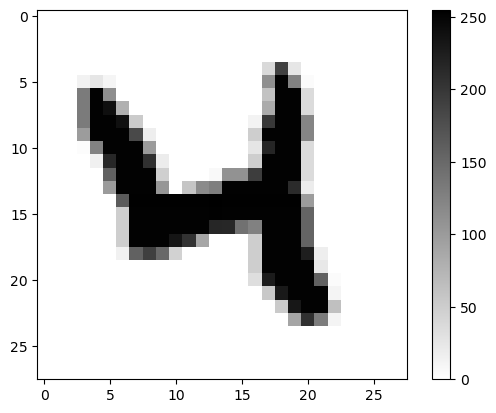

In [158]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 20

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [159]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 113,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61, 252, 252

In [160]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf) # 줄 바꾸지 않기
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 113,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61, 252, 252

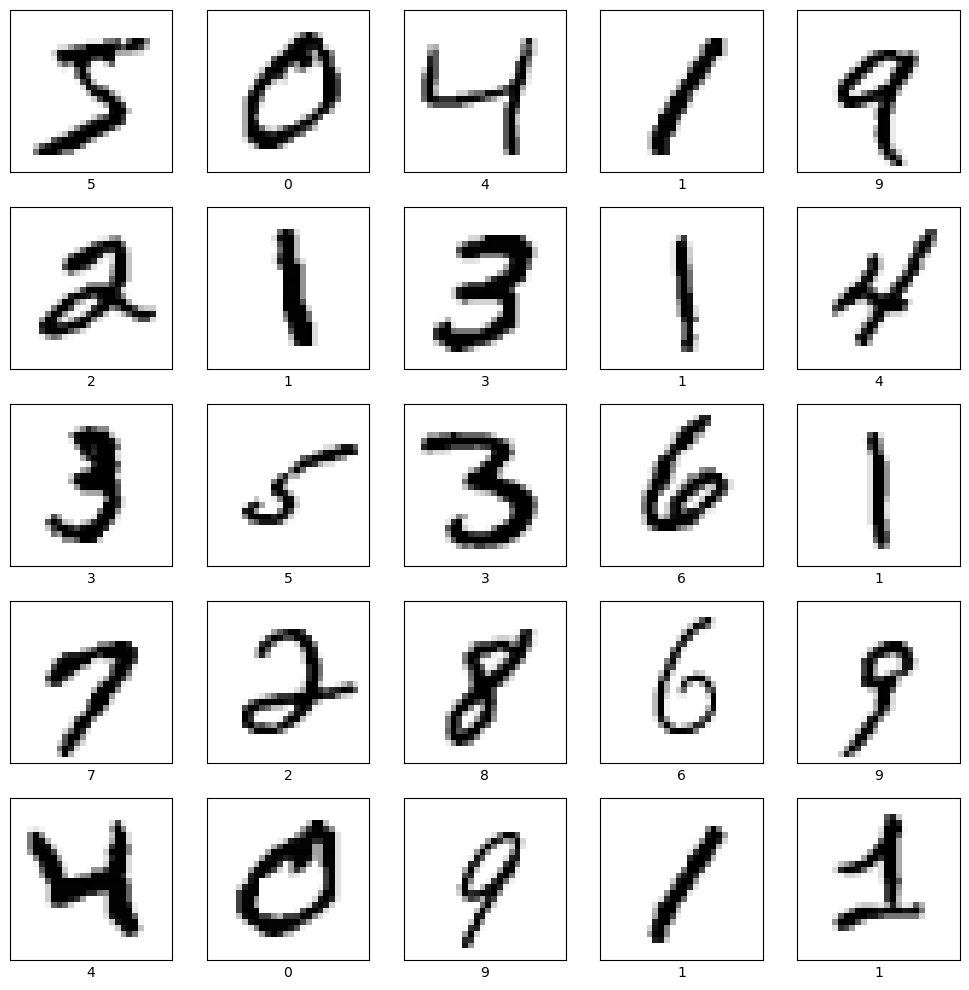

In [161]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

### (1) 데이터 2차원으로 펼치기

In [164]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [165]:
a = np.array([[1,2,3],[4,5,6]])
a, a.shape

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3))

In [166]:
#
print(a.reshape(3,2))
print(a.reshape(6,1))
print(a.reshape(6, -1))


[[1 2]
 [3 4]
 [5 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [167]:
x_train = x_train.reshape(60000, -1)
x_val = x_val.reshape(10000, -1)

In [168]:
x_train.shape, x_val.shape

((60000, 784), (10000, 784))

### (2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_test를 그냥 255로 나누면 됨

In [170]:
x_train = x_train / 255.
x_val = x_val / 255.

## 4.모델링

In [172]:
nfeatures = x_train.shape[1]
nfeatures

784

In [233]:
clear_session()

model = Sequential([Input(shape=(nfeatures,)),
                    Dense(10, activation='softmax')])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [174]:
model.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy' )

history = model.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7971 - val_loss: 0.3169
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3236 - val_loss: 0.2871
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2980 - val_loss: 0.2773
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2812 - val_loss: 0.2719
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2742 - val_loss: 0.2668
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2652 - val_loss: 0.2643
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2588 - val_loss: 0.2632
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2652 - val_loss: 0.2612
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2519 - val_loss: 0.2619
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2508 - val_loss: 0.2615


* 학습결과 그래프

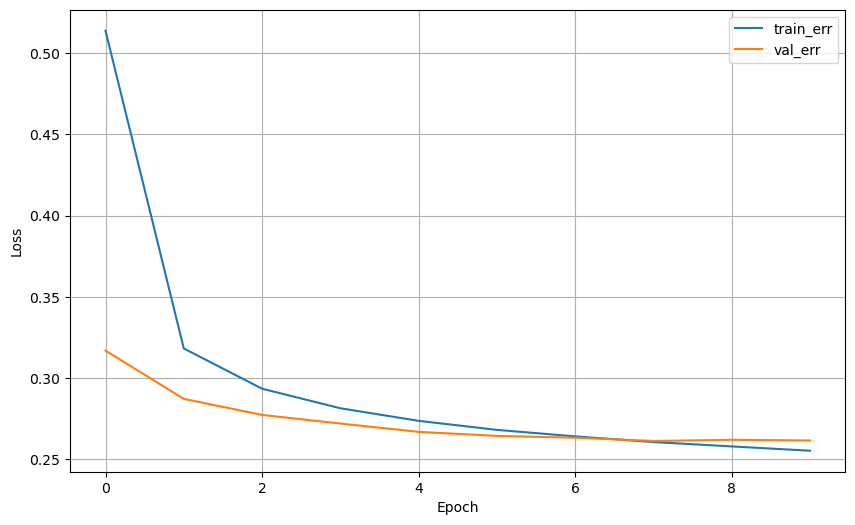

In [176]:
dl_history_plot(history)

* 예측 및 평가

In [178]:
pred = model.predict(x_val)
pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.0889800e-06, 1.0050971e-11, 4.4110152e-06, 1.1204970e-02, 4.1308175e-07, 2.0631069e-05, 6.3960282e-12, 9.8819411e-01, 1.4062257e-05, 5.5929605e-04],
       [1.5483474e-04, 3.0496443e-05, 9.9495834e-01, 4.8111844e-05, 2.6204477e-14, 8.5464888e-04, 3.9168294e-03, 7.2681647e-18, 3.6780504e-05, 1.7415772e-14],
       [1.7675654e-06, 9.8457843e-01, 7.9970462e-03, 2.1154159e-03, 1.3276585e-04, 5.4424390e-04, 7.4990006e-04, 4.0889828e-04, 3.2803630e-03, 1.9122203e-04],
       [9.9983680e-01, 3.9259346e-11, 2.5792691e-05, 4.8110478e-06, 5.0352984e-08, 5.5859906e-05, 5.6198620e-05, 7.0553256e-06, 4.5730371e-06, 8.9139958e-06],
       [3.4667688e-04, 3.5392173e-07, 1.5507430e-03, 3.2078529e-05, 9.7005510e-01, 7.5842057e-05, 1.1903642e-03, 1.5774688e-03, 3.2597322e-03, 2.1911509e-02]], dtype=float32)

In [179]:
pred_1 = pred.argmax(axis=1)
pred_1[:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [180]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[ 963    0    0    2    0    5    7    2    1    0]
 [   0 1119    3    2    0    1    4    2    4    0]
 [   5   16  907   23    9    5   13   10   41    3]
 [   3    0   12  931    1   23    2   10   21    7]
 [   1    2    5    2  924    0    8    4    7   29]
 [   8    3    4   39    9  774   14    7   28    6]
 [  12    3    5    2    7   15  911    1    2    0]
 [   1    9   18   11    9    0    0  943    2   35]
 [   7   11    6   28    9   27    9   10  861    6]
 [  11    7    1   15   26    5    0   22    3  919]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.94      0.88      0.91      1032
           3       0.88      0.92      0.90      1010
           4       0.93      0.94      0.94       982
           5       0.91      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92   

## 5.실습

* 히든레이어를 추가하여 모델을 2가지 이상 만들고 성능을 비교해 봅시다.
* 성능에 영향을 주는 요인은
    * 히든레이어 수
    * 노드수
    * epochs 수 (10~20 사이에서 정하세요)
    * learning_rate

### (1) 모델1

In [199]:
nfeatures = x_train.shape[1]
nfeatures 

784

In [200]:
clear_session()

model1 = Sequential([Input(shape=(nfeatures,)),
                    Dense(10, activation='softmax')])

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [201]:
model1.compile(optimizer=Adam(learning_rate=0.1), loss='sparse_categorical_crossentropy')
history1 = model1.fit(x_train, y_train, epochs=10, validation_split=0.2).history

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.6106 - val_loss: 1.5230
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7389 - val_loss: 1.9479
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8172 - val_loss: 2.0190
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7396 - val_loss: 1.7177
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8332 - val_loss: 2.3554
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9683 - val_loss: 2.2871
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8014 - val_loss: 2.0732
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8763 - val_loss: 2.1214
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8237 - val_loss: 1.9100
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8435 - val_loss: 2.3253


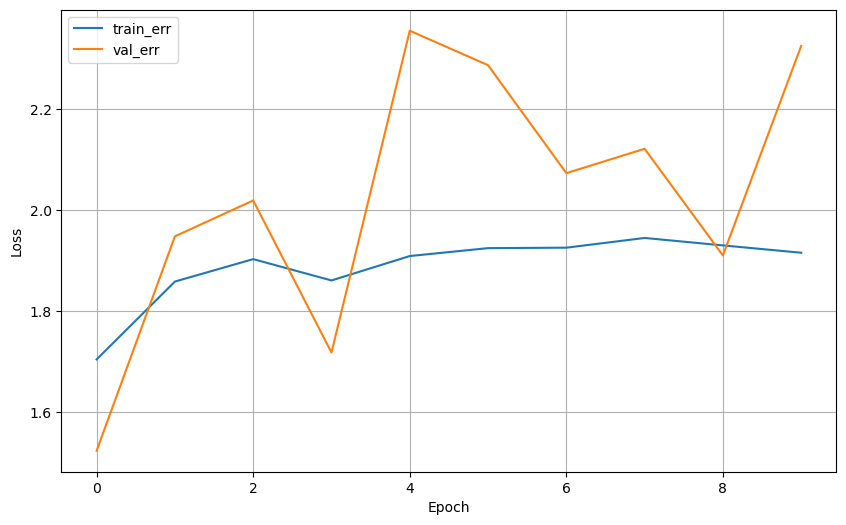

In [202]:
dl_history_plot(history1)

In [203]:
pred1 = model1.predict(x_val)
pred1 = pred1.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [204]:
print(pred1[:5])
print(confusion_matrix(y_val, pred1))
print(classification_report(y_val, pred1))

[7 2 1 0 4]
[[ 938    0    1    1    6   28    4    2    0    0]
 [   1 1120    5    2    0    2    3    1    1    0]
 [  10   12  928   24   12    6   12   11   14    3]
 [  10    3   22  873    4   72    2   16    3    5]
 [   1    6    7    2  921    1    6    9    5   24]
 [   9    5    6   32   14  798   13    5    4    6]
 [  17    2   22    4   15   34  863    1    0    0]
 [   1   13   17    9   12    3    0  911    1   61]
 [  21   28   42   66   38   92   10   21  610   46]
 [   6    7    0   16   69   12    0   55    1  843]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       980
           1       0.94      0.99      0.96      1135
           2       0.88      0.90      0.89      1032
           3       0.85      0.86      0.86      1010
           4       0.84      0.94      0.89       982
           5       0.76      0.89      0.82       892
           6       0.95      0.90      0.92       958
           7       0.88 

### (2) 모델2

In [213]:
# 모델구조
model2 = Sequential([Input(shape=(nfeatures,)),
                           Dense(512,activation='relu'),
                           Dense(256,activation='relu'),
                           Dense(128,activation='relu'),
                           Dense(32,activation='relu'),
                           Dense(10,activation='softmax')])

In [215]:
# 컴파일, 학습
model2.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')
result2 = model2.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.4171 - val_loss: 0.1149
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.1027 - val_loss: 0.1114
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0684 - val_loss: 0.0907
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0507 - val_loss: 0.0922
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0425 - val_loss: 0.0992
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0313 - val_loss: 0.0831
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0266 - val_loss: 0.0867
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0242 - val_loss: 0.0967
Epoch 9/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0224 - val_loss: 0.0981
Epoch 10/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0209 - val_loss: 0.1268
Epoch 11/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 0.0183 - val_loss: 0.1140
Epoch 12/50
1500/15

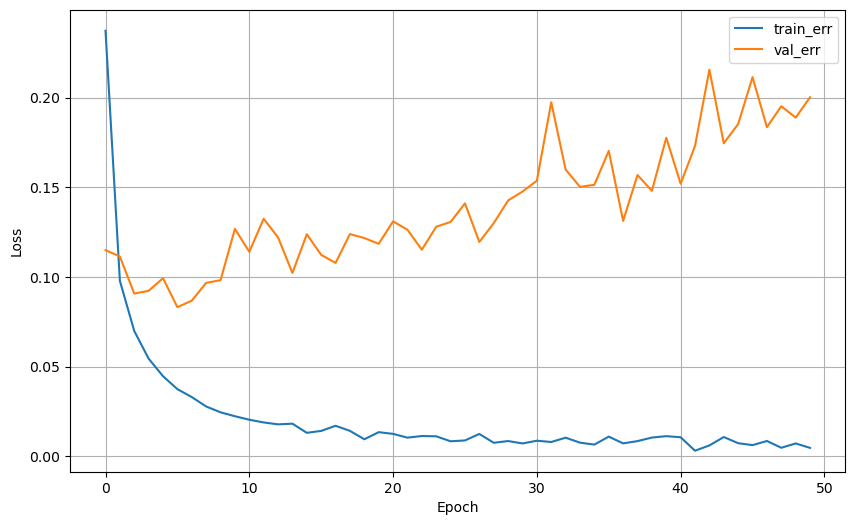

In [219]:
# 학습 곡선
dl_history_plot(result2.history)

In [221]:
# 예측 
pred2 = model2.predict(x_val)
pred2_1 = pred2.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [227]:
# 평가
print(confusion_matrix(y_val, pred2_1))
print(classification_report(y_val, pred2_1))

[[ 971    1    1    0    0    3    2    1    1    0]
 [   0 1123    1    0    0    1    2    1    7    0]
 [   2    0 1015    2    2    1    5    4    1    0]
 [   0    0    2  998    0    3    0    1    5    1]
 [   1    1    1    1  961    0    4    3    0   10]
 [   2    0    1   16    0  864    3    1    4    1]
 [   2    2    0    1    3    3  943    0    4    0]
 [   1    1    9    2    0    0    1 1005    5    4]
 [   0    0    1    3    1    1    0    2  965    1]
 [   1    2    2    2    6    1    0    5    5  985]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98   